In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import joblib

In [3]:
data = pd.read_csv('Traffic.csv')
data.head()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,31,0,4,4,39,low
1,12:15:00 AM,10,Tuesday,49,0,3,3,55,low
2,12:30:00 AM,10,Tuesday,46,0,3,6,55,low
3,12:45:00 AM,10,Tuesday,51,0,2,5,58,low
4,1:00:00 AM,10,Tuesday,57,6,15,16,94,normal


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2976 entries, 0 to 2975
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Time               2976 non-null   object
 1   Date               2976 non-null   int64 
 2   Day of the week    2976 non-null   object
 3   CarCount           2976 non-null   int64 
 4   BikeCount          2976 non-null   int64 
 5   BusCount           2976 non-null   int64 
 6   TruckCount         2976 non-null   int64 
 7   Total              2976 non-null   int64 
 8   Traffic Situation  2976 non-null   object
dtypes: int64(6), object(3)
memory usage: 209.4+ KB


In [7]:
#Handling any inconsistensis of column names
data.columns = data.columns.str.strip()
data.columns = data.columns.str.replace(',', '')
data.columns = data.columns.str.replace(' ', '_')
data.columns = data.columns.str.lower()

In [8]:
#Checking for duplicates
data[data.duplicated(keep=False)]

,time,date,day_of_the_week,carcount,bikecount,buscount,truckcount,total,traffic_situation


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2976 entries, 0 to 2975
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   time               2976 non-null   object
 1   date               2976 non-null   int64 
 2   day_of_the_week    2976 non-null   object
 3   carcount           2976 non-null   int64 
 4   bikecount          2976 non-null   int64 
 5   buscount           2976 non-null   int64 
 6   truckcount         2976 non-null   int64 
 7   total              2976 non-null   int64 
 8   traffic_situation  2976 non-null   object
dtypes: int64(6), object(3)
memory usage: 209.4+ KB


/usr/local/lib/python3.10/dist-packages/scipy/cluster/hierarchy.py:2847: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim([dvw, 0])


<Axes: >

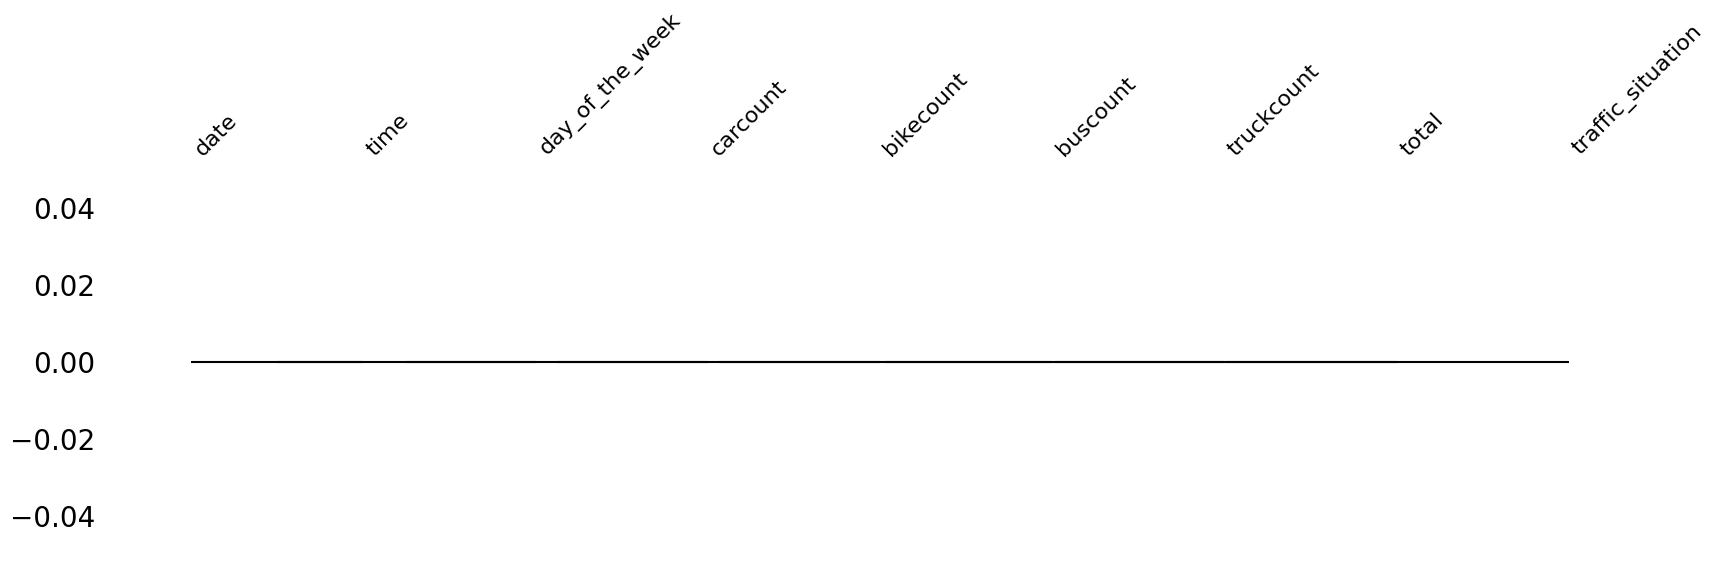

In [12]:
msno.dendrogram(data,figsize=(20,5))

In [13]:
data.isnull().sum()

time                 0
date                 0
day_of_the_week      0
carcount             0
bikecount            0
buscount             0
truckcount           0
total                0
traffic_situation    0
dtype: int64

From these functions its understood that our dataset doesnt contain anyone missing values or null values.

In [14]:
#Converting the data column to datetime object so we can get better results of our analysis
#Get the day of the week,month and time of the crimes
data.date = pd.to_datetime(data.date)
data['day_of_the_week'] = data.date.dt.day_name()
data['time'] = data.date.dt.hour

In [16]:
data.head()

,time,date,day_of_the_week,carcount,bikecount,buscount,truckcount,total,traffic_situation
0,0,1970-01-01 00:00:00.000000010,Thursday,31,0,4,4,39,low
1,0,1970-01-01 00:00:00.000000010,Thursday,49,0,3,3,55,low
2,0,1970-01-01 00:00:00.000000010,Thursday,46,0,3,6,55,low
3,0,1970-01-01 00:00:00.000000010,Thursday,51,0,2,5,58,low
4,0,1970-01-01 00:00:00.000000010,Thursday,57,6,15,16,94,normal


In [19]:
testing_data = data.sample(n=20)

In [20]:
testing_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 1509 to 1188
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   time               20 non-null     int64         
 1   date               20 non-null     datetime64[ns]
 2   day_of_the_week    20 non-null     object        
 3   carcount           20 non-null     int64         
 4   bikecount          20 non-null     int64         
 5   buscount           20 non-null     int64         
 6   truckcount         20 non-null     int64         
 7   total              20 non-null     int64         
 8   traffic_situation  20 non-null     object        
dtypes: datetime64[ns](1), int64(6), object(2)
memory usage: 1.6+ KB


In [24]:
testing_data.to_csv('/content/testing_data.csv')